In [65]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, StrMethodFormatter

import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

In [3]:
cd data

C:\Users\joshu\Documents\Flatiron\phase_2\phase2_project-\data


In [4]:
df = pd.read_csv("kc_house_data.csv", index_col=0)

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [6]:
df.corr()["price"]

price            1.000000
bedrooms         0.289204
bathrooms        0.480401
sqft_living      0.608521
sqft_lot         0.085730
floors           0.180576
sqft_above       0.538651
sqft_basement    0.245058
sqft_garage      0.264169
sqft_patio       0.313409
yr_built         0.096013
yr_renovated     0.084786
lat              0.063632
long            -0.022509
Name: price, dtype: float64

In [7]:
df = df.drop(df[(df.lat < 45) | (df.lat > 50)].index)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.932000e+04,29320.000000,29320.000000,29320.000000,2.932000e+04,29320.00000,29320.000000,29320.000000,29320.000000,29320.000000,29320.000000,29320.000000,29320.000000,29320.000000
mean,1.112529e+06,3.433970,2.333271,2130.448295,1.715335e+04,1.51927,1825.671351,480.568554,336.051910,216.490655,1973.989495,93.511664,47.539703,-122.172311
std,8.947518e+05,0.979028,0.895856,977.250645,6.118091e+04,0.55005,880.841960,585.498500,286.138816,246.588377,31.716785,422.075192,0.169308,1.052834
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.00000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.006190,-122.849585
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.00000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.428500,-122.328430
50%,8.670000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.50000,1580.000000,0.000000,400.000000,146.500000,1976.000000,0.000000,47.557268,-122.233812
75%,1.310000e+06,4.000000,3.000000,2640.000000,1.075725e+04,2.00000,2290.000000,960.000000,510.000000,310.000000,2001.000000,0.000000,47.671950,-122.126874
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.00000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,48.547250,-84.397050


In [8]:
df = df.drop(df[(df.long < -125) | (df.long > -120)].index)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.926700e+04,29267.000000,29267.000000,29267.000000,2.926700e+04,29267.000000,29267.000000,29267.000000,29267.000000,29267.000000,29267.000000,29267.000000,29267.000000,29267.000000
mean,1.112319e+06,3.434175,2.332149,2130.068507,1.717771e+04,1.517955,1825.237127,480.610244,336.109987,216.457375,1973.913794,93.681006,47.541294,-122.214649
std,8.950263e+05,0.979038,0.895551,977.218178,6.123344e+04,0.549265,880.601061,585.738107,286.198351,246.715353,31.694673,422.438426,0.159553,0.144350
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.479530,-122.849585
25%,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.429170,-122.328535
50%,8.660000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,142.000000,1976.000000,0.000000,47.557450,-122.234375
75%,1.310000e+06,4.000000,3.000000,2639.500000,1.077200e+04,2.000000,2290.000000,960.000000,510.000000,310.000000,2001.000000,0.000000,47.672010,-122.127595
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,48.111504,-121.163960


In [9]:
def outlier(col_name):
    q1 = np.quantile(df[col_name], 0.25)
    q3 = np.quantile(df[col_name], 0.75) 
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr

    # find records that fall outside of the lower and upper bound
    outliers = df[(df[col_name]<lower_bound) | (df[col_name]>upper_bound)]
    print("Lower bound: ", lower_bound, "\n" "Upper bound: ", upper_bound)
    return outliers

In [10]:
outlier("price")

Lower bound:  -352500.0 
Upper bound:  2307500.0


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
5424700190,2/26/2022,4500000.0,4,3.0,2760,13150,1.5,NO,NO,NO,...,PUBLIC,2760,0,0,160,1954,0,"8637 Northeast 6th Street, Medina, Washington ...",47.615710,-122.223990
1925059107,6/29/2021,2450000.0,4,3.5,2300,8370,2.0,NO,NO,NO,...,PUBLIC,2300,0,560,110,1950,1995,"9411 Northeast 32nd Street, Clyde Hill, Washin...",47.639005,-122.214107
1726059053,3/22/2022,3850000.0,5,3.5,4180,209959,1.0,NO,NO,NO,...,PRIVATE,4180,0,0,0,2016,0,"10919 Northeast 164th Lane, Bothell, Washingto...",47.745460,-122.194980
6865200085,3/7/2022,2500000.0,4,3.5,3120,3801,2.0,NO,NO,YES,...,PUBLIC,2540,1170,590,380,2021,0,"1305 North 50th Street, Seattle, Washington 98...",47.664785,-122.341635
5425700191,12/15/2021,3000000.0,3,1.5,2040,14284,1.0,NO,NO,NO,...,PUBLIC,2040,0,400,0,1952,0,"2539 82nd Avenue Northeast, Medina, Washington...",47.633020,-122.232570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582050010,4/21/2022,2588000.0,5,4.5,3580,5719,2.0,NO,NO,NO,...,PUBLIC,3580,0,460,220,2019,0,"21802 Southeast 5th Place, Sammamish, Washingt...",47.604675,-122.048760
7588700215,4/11/2022,2875000.0,3,2.0,1900,8800,1.0,NO,NO,NO,...,PUBLIC,1600,1100,200,80,1953,0,"8322 16th Avenue Northwest, Seattle, Washingto...",47.689410,-122.377560
1087500050,11/30/2021,3754500.0,4,5.5,5200,10790,2.0,NO,NO,NO,...,PUBLIC,5200,0,730,400,2021,0,"12237 Northeast 66th Street, Kirkland, Washing...",47.664625,-122.175870


In [11]:
df = df.drop(df[(df.price < -352500.0) | (df.price > 2307500.0)].index)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.738800e+04,27388.000000,27388.000000,27388.000000,2.738800e+04,27388.000000,27388.000000,27388.000000,27388.000000,27388.000000,27388.000000,27388.000000,27388.000000,27388.000000
mean,9.488559e+05,3.380824,2.245564,2007.434387,1.606127e+04,1.497444,1725.254381,455.587739,320.526398,201.497335,1973.160946,85.414123,47.535761,-122.216138
std,4.435902e+05,0.952787,0.803689,804.387396,5.472772e+04,0.546913,749.388585,548.191006,272.994372,228.352371,31.493235,404.175938,0.162532,0.146063
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.479530,-122.849585
25%,6.300000e+05,3.000000,2.000000,1410.000000,4.981750e+03,1.000000,1170.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.412028,-122.331740
50%,8.350000e+05,3.000000,2.500000,1880.000000,7.440000e+03,1.500000,1520.000000,0.000000,390.000000,140.000000,1975.000000,0.000000,47.547452,-122.245548
75%,1.200000e+06,4.000000,2.500000,2490.000000,1.031800e+04,2.000000,2150.250000,920.000000,500.000000,298.500000,2000.000000,0.000000,47.672546,-122.128049
max,2.305000e+06,11.000000,7.500000,8020.000000,3.067495e+06,4.000000,6630.000000,3560.000000,3580.000000,4370.000000,2022.000000,2022.000000,48.111504,-121.163960


In [12]:
outlier("sqft_living")

Lower bound:  -210.0 
Upper bound:  4110.0


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
1421059003,8/25/2021,1680000.0,3,2.5,5200,206039,1.0,NO,NO,NO,...,PRIVATE,3170,2030,1080,670,2007,0,"15916 Southeast 326th Street, Auburn, Washingt...",47.310595,-122.129380
7327700100,3/2/2022,2225000.0,10,2.5,5000,435600,2.0,YES,NO,NO,...,PRIVATE,5000,0,360,40,1945,0,"212th Way Southeast, Enumclaw, Washington 9809...",47.274460,-122.055840
526069046,5/23/2022,1950000.0,5,3.5,4300,257004,2.0,NO,NO,NO,...,PRIVATE,3370,930,1000,980,1977,0,"19026 201st Avenue Northeast, Woodinville, Was...",47.767570,-122.068280
626059265,12/14/2021,2134990.0,5,3.5,4440,10439,2.0,NO,NO,NO,...,PUBLIC,4440,0,660,290,2021,0,"19307 85th Avenue Northeast, Bothell, Washingt...",47.766816,-122.226739
3276920440,3/21/2022,2100000.0,4,3.5,4210,35286,2.0,NO,NO,NO,...,PRIVATE,4210,0,830,0,1988,0,"26015 Southeast 29th Street, Sammamish, Washin...",47.583630,-121.992280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425069144,7/1/2021,1975000.0,4,2.5,4200,108900,2.0,NO,NO,NO,...,PRIVATE,4200,0,390,490,1989,0,"21336 Northeast 92nd Place, Redmond, Washingto...",47.684710,-122.055400
9530100035,8/14/2021,1900000.0,6,4.5,4360,12059,2.0,NO,NO,YES,...,PUBLIC,2920,1440,400,480,1961,0,"5401 Baker Avenue Northwest, Seattle, Washingt...",47.667980,-122.360450
5463500020,5/21/2022,1910000.0,4,4.5,4180,10811,2.0,NO,NO,NO,...,PUBLIC,3620,560,0,1980,1972,0,"4825 88th Avenue Southeast, Mercer Island, Was...",47.559330,-122.221840


In [13]:
df = df.drop(df[(df.sqft_living < -210.0) | (df.sqft_living > 4110.0)].index)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.699100e+04,26991.000000,26991.000000,26991.000000,2.699100e+04,26991.000000,26991.000000,26991.000000,26991.000000,26991.000000,26991.000000,26991.000000,26991.000000,26991.000000
mean,9.382212e+05,3.362121,2.220240,1969.572821,1.538288e+04,1.491534,1695.417139,447.678115,315.422845,196.830240,1972.855322,85.633841,47.535755,-122.217386
std,4.343472e+05,0.937203,0.774526,744.153247,5.333775e+04,0.546836,706.001285,537.934331,267.562440,220.969253,31.467838,404.671351,0.162678,0.145601
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.479530,-122.849585
25%,6.250000e+05,3.000000,2.000000,1400.000000,4.940000e+03,1.000000,1170.000000,0.000000,0.000000,30.000000,1952.000000,0.000000,47.412025,-122.332255
50%,8.280000e+05,3.000000,2.500000,1870.000000,7.400000e+03,1.500000,1510.000000,0.000000,380.000000,140.000000,1975.000000,0.000000,47.547500,-122.249130
75%,1.195000e+06,4.000000,2.500000,2456.000000,1.019200e+04,2.000000,2120.000000,920.000000,500.000000,290.000000,1999.000000,0.000000,47.672635,-122.130178
max,2.305000e+06,11.000000,7.500000,4110.000000,3.067495e+06,4.000000,5500.000000,3560.000000,2840.000000,4370.000000,2022.000000,2022.000000,48.111504,-121.163960


In [14]:
df.corr()["price"]

price            1.000000
bedrooms         0.297751
bathrooms        0.417150
sqft_living      0.548690
sqft_lot         0.057270
floors           0.207554
sqft_above       0.455193
sqft_basement    0.193079
sqft_garage      0.216719
sqft_patio       0.230983
yr_built         0.075718
yr_renovated     0.057106
lat              0.404484
long             0.121231
Name: price, dtype: float64

In [126]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
greenbelt                object
nuisance                 object
view                     object
condition                object
grade                    object
heat_source              object
sewer_system             object
sqft_above                int64
sqft_basement             int64
sqft_garage               int64
sqft_patio                int64
yr_built                  int64
yr_renovated              int64
address                  object
lat                     float64
long                    float64
dtype: object

In [16]:
df["date"] = pd.to_datetime(df["date"], format="%m/%d/%Y")

In [28]:
q1_2021 = df.loc[(df["date"] >= "2021-01-01") & (df["date"] <= "2021-03-31")]
q2_2021 = df.loc[(df["date"] >= "2021-04-01") & (df["date"] <= "2021-06-30")]
q3_2021 = df.loc[(df["date"] >= "2021-07-01") & (df["date"] <= "2021-09-30")]
q4_2021 = df.loc[(df["date"] >= "2021-10-01") & (df["date"] <= "2021-12-31")]

q1_2022 = df.loc[(df["date"] >= "2022-01-01") & (df["date"] <= "2022-03-31")]
q2_2022 = df.loc[(df["date"] >= "2022-04-01") & (df["date"] <= "2022-06-30")]
q3_2022 = df.loc[(df["date"] >= "2022-07-01") & (df["date"] <= "2022-09-30")]
q4_2022 = df.loc[(df["date"] >= "2022-10-01") & (df["date"] <= "2022-12-31")]

In [37]:
q2_2021.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.253000e+03,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000
mean,9.289242e+05,3.408788,2.291167,2049.518420,14997.076343,1.529738,1769.782956,440.537062,330.606747,208.481136,1974.672881,82.551709,47.538984,-122.212259
std,4.153437e+05,0.919134,0.771522,762.774297,41869.322728,0.556133,730.850206,538.471292,265.718433,226.304133,31.494184,397.945586,0.158820,0.148179
min,7.250000e+04,1.000000,0.500000,430.000000,487.000000,1.000000,390.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.479530,-122.717880
25%,6.325000e+05,3.000000,2.000000,1450.000000,5000.000000,1.000000,1210.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.414645,-122.329565
50%,8.255000e+05,3.000000,2.500000,1950.000000,7245.000000,1.500000,1580.000000,0.000000,400.000000,140.000000,1978.000000,0.000000,47.552240,-122.234335
75%,1.170000e+06,4.000000,2.500000,2590.000000,10240.000000,2.000000,2260.000000,910.000000,505.000000,300.000000,2002.000000,0.000000,47.677400,-122.124460
max,2.300000e+06,9.000000,7.500000,4110.000000,690108.000000,4.000000,4110.000000,2170.000000,1530.000000,2030.000000,2022.000000,2022.000000,47.777180,-121.346085


In [38]:
q3_2021.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,8.499000e+03,8499.000000,8499.000000,8499.000000,8.499000e+03,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000
mean,9.084243e+05,3.394752,2.271561,2018.023885,1.500213e+04,1.510766,1741.349335,443.071655,329.337098,199.757383,1974.452641,82.307683,47.539756,-122.212678
std,4.181306e+05,0.934713,0.768070,760.800590,4.729375e+04,0.543665,725.234924,541.856810,268.749518,224.374179,31.167907,397.191959,0.155340,0.145864
min,3.648000e+04,0.000000,0.000000,290.000000,4.020000e+02,1.000000,290.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.479530,-122.719810
25%,6.050000e+05,3.000000,2.000000,1430.000000,4.875000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.421395,-122.329635
50%,8.040000e+05,3.000000,2.500000,1910.000000,7.392000e+03,1.500000,1560.000000,0.000000,400.000000,140.000000,1977.000000,0.000000,47.551780,-122.234125
75%,1.125000e+06,4.000000,2.500000,2520.000000,1.024500e+04,2.000000,2190.000000,910.000000,510.000000,300.000000,2001.000000,0.000000,47.673210,-122.121987
max,2.301000e+06,11.000000,7.000000,4110.000000,1.951712e+06,4.000000,4550.000000,2750.000000,2570.000000,4370.000000,2022.000000,2022.000000,48.111504,-121.163960


In [39]:
q4_2021.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,6.619000e+03,6619.000000,6619.000000,6619.000000,6.619000e+03,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000,6619.000000
mean,8.973724e+05,3.370600,2.212041,1953.804351,1.700531e+04,1.478471,1671.112857,461.905122,305.706149,198.123886,1971.962230,92.668530,47.532409,-122.221369
std,4.247798e+05,0.956118,0.800296,746.500658,7.230172e+04,0.552499,702.061882,537.641840,267.647082,219.050589,31.458657,420.242149,0.169917,0.142764
min,2.736000e+04,0.000000,0.000000,3.000000,4.750000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.480020,-122.725505
25%,6.000000e+05,3.000000,2.000000,1390.000000,4.971000e+03,1.000000,1160.000000,0.000000,0.000000,20.000000,1951.000000,0.000000,47.409472,-122.331570
50%,7.950000e+05,3.000000,2.000000,1850.000000,7.499000e+03,1.000000,1480.000000,0.000000,350.000000,140.000000,1972.000000,0.000000,47.545230,-122.258868
75%,1.100000e+06,4.000000,2.500000,2438.500000,1.033400e+04,2.000000,2060.000000,930.000000,490.000000,290.000000,1998.000000,0.000000,47.671830,-122.140395
max,2.301000e+06,9.000000,7.500000,4110.000000,3.067495e+06,4.000000,4109.000000,3560.000000,2840.000000,2210.000000,2022.000000,2022.000000,48.111504,-121.315030


In [40]:
q1_2022.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,4.752000e+03,4752.000000,4752.000000,4752.000000,4.752000e+03,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000,4752.000000
mean,9.524630e+05,3.291877,2.146044,1878.501684,1.451702e+04,1.480640,1621.339646,436.804293,295.372896,185.496423,1971.508838,89.031987,47.529935,-122.224781
std,4.446954e+05,0.950265,0.761932,707.630209,4.514210e+04,0.560621,666.944222,523.156200,262.253133,214.809390,32.269759,412.075165,0.170239,0.144416
min,2.756300e+04,0.000000,0.000000,210.000000,4.200000e+02,1.000000,210.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.499480,-122.732860
25%,6.400000e+05,3.000000,1.500000,1340.000000,4.723750e+03,1.000000,1130.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,47.398528,-122.335525
50%,8.450000e+05,3.000000,2.000000,1780.000000,7.276000e+03,1.000000,1460.000000,0.000000,330.000000,120.000000,1970.000000,0.000000,47.542475,-122.272300
75%,1.210000e+06,4.000000,2.500000,2330.000000,1.000000e+04,2.000000,1990.000000,900.000000,480.000000,270.000000,1998.000000,0.000000,47.669277,-122.147433
max,2.305000e+06,9.000000,6.500000,4110.000000,1.277541e+06,4.000000,5500.000000,2510.000000,2210.000000,2360.000000,2022.000000,2022.000000,47.777430,-121.276390


In [41]:
q2_2022.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,4.868000e+03,4868.000000,4868.000000,4868.000000,4.868000e+03,4868.000000,4868.000000,4868.000000,4868.000000,4868.000000,4868.000000,4868.000000,4868.000000,4868.000000
mean,1.036186e+06,3.340592,2.181389,1958.323541,1.486538e+04,1.468673,1686.165366,450.295809,316.886606,195.632293,1971.754108,79.985210,47.537506,-122.215344
std,4.572327e+05,0.906486,0.754799,727.235770,4.424472e+04,0.524414,694.016318,545.183616,269.644870,220.629163,31.046929,391.612483,0.159123,0.148496
min,4.764300e+04,0.000000,0.000000,260.000000,4.860000e+02,1.000000,260.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.480020,-122.849585
25%,7.000000e+05,3.000000,2.000000,1410.000000,5.000000e+03,1.000000,1160.000000,0.000000,0.000000,30.000000,1951.000000,0.000000,47.411798,-122.336574
50%,9.200000e+05,3.000000,2.500000,1866.000000,7.500000e+03,1.000000,1510.000000,0.000000,380.000000,130.000000,1974.000000,0.000000,47.544800,-122.246543
75%,1.325000e+06,4.000000,2.500000,2433.250000,1.016425e+04,2.000000,2110.000000,920.000000,500.000000,290.000000,1997.000000,0.000000,47.674185,-122.123945
max,2.305000e+06,8.000000,6.000000,4110.000000,1.354280e+06,4.000000,4110.000000,3180.000000,2240.000000,2000.000000,2022.000000,2022.000000,47.876700,-121.319590


In [46]:
q2_2022.corr()["price"]

price            1.000000
bedrooms         0.295983
bathrooms        0.412732
sqft_living      0.543039
sqft_lot         0.074464
floors           0.229780
sqft_above       0.455849
sqft_basement    0.174322
sqft_garage      0.231787
sqft_patio       0.242062
yr_built         0.090196
yr_renovated     0.043653
lat              0.423396
long             0.149701
Name: price, dtype: float64

In [129]:
print(q2_2021["price"].mean(),"\n",q3_2021["price"].mean(),"\n",q4_2021["price"].mean(),"\n",q1_2022["price"].mean(), "\n", q2_2022["price"].mean())

928924.1970705725 
 908424.2994469937 
 897372.4349599638 
 952462.9981060605 
 1036185.8428512736


In [61]:
quarters = [["Q2 2021", 928924.1970705725], ["Q3 2021", 908424.2994469937], ["Q4 2021", 897372.4349599638], ["Q1 2022", 952462.9981060605], ["Q2 2022", 1036185.8428512736]]

In [114]:
quarter_df = pd.DataFrame(quarters, columns=["Quarters", "Average Price"])

In [115]:
quarter_df["std"] = [q2_2021["price"].std(), 
                     q3_2021["price"].std(),
                     q4_2021["price"].std(),
                     q1_2022["price"].std(),
                     q2_2022["price"].std()]

In [116]:
quarter_df["count"] = [len(q2_2021), 
                     len(q3_2021),
                     len(q4_2021),
                     len(q1_2022),
                     len(q2_2022)]

In [117]:
quarter_df["Deg of Freedom"] = quarter_df["count"] - 1

In [119]:
quarter_df["Diff"] = abs(quarter_df["Average Price"] - df["price"].mean())

In [123]:
quarter_df["t"] = quarter_df["Diff"] / (quarter_df["std"]/np.sqrt(quarter_df["count"]))

In [124]:
quarter_df

,Quarters,Average Price,std,count,Deg of Freedom,Diff,t
0,Q2 2021,9.289242e+05,415343.694416,2253,2252,9297.037193,1.062472
1,Q3 2021,9.084243e+05,418130.630142,8499,8498,29796.934816,6.569670
2,Q4 2021,8.973724e+05,424779.843316,6619,6618,40848.799303,7.823689
3,Q1 2022,9.524630e+05,444695.352955,4752,4751,14241.763843,2.207697
4,Q2 2022,1.036186e+06,457232.734659,4868,4867,97964.608588,14.948829


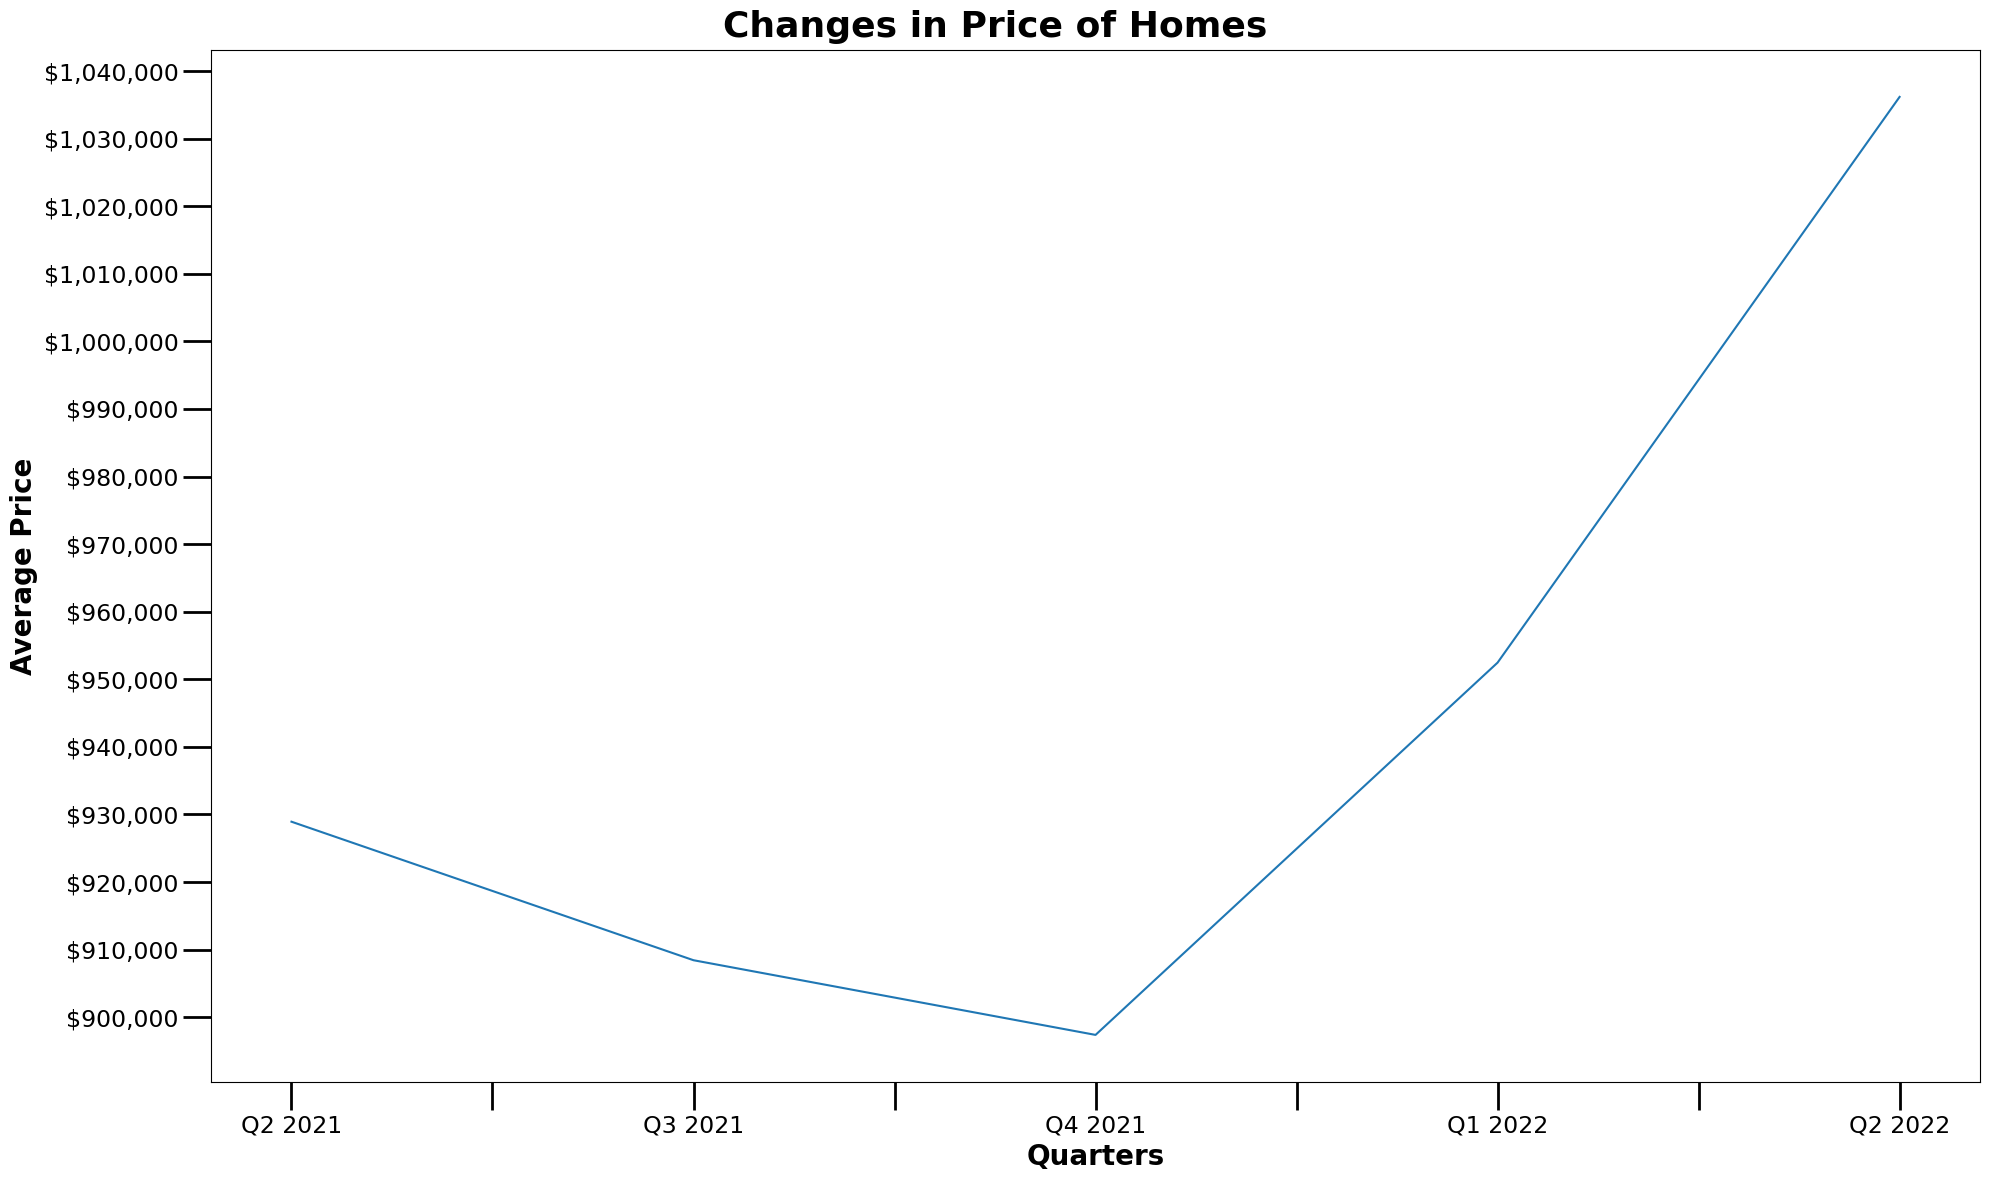

In [102]:
fig, ax = plt.subplots(figsize=(20,12), dpi=100)

quarter_df.plot.line(x="Quarters", y="Average Price", ax=ax)

ax.yaxis.set_major_locator(MultipleLocator(10000.00))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

ax.tick_params('both', length=20, width=2, which='major')

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

fig.suptitle("Changes in Price of Homes", fontweight='bold', fontsize=26)
ax.set_xlabel("Quarters", fontsize=20, fontweight='bold')
ax.set_ylabel("Average Price", fontsize=20, fontweight='bold')
ax.get_legend().remove()

plt.tight_layout();

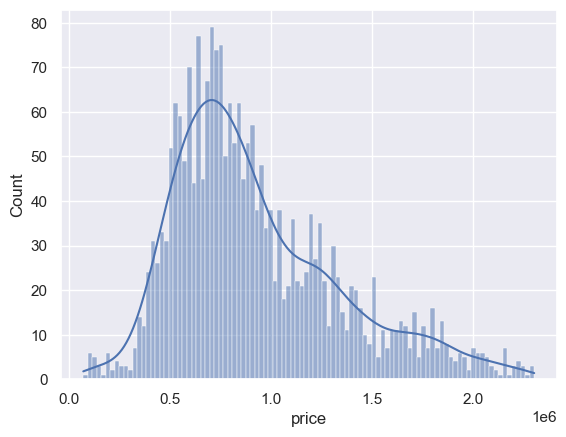

In [133]:
sns.set(color_codes=True)
sns.histplot(q2_2021["price"], kde=True, bins=100);

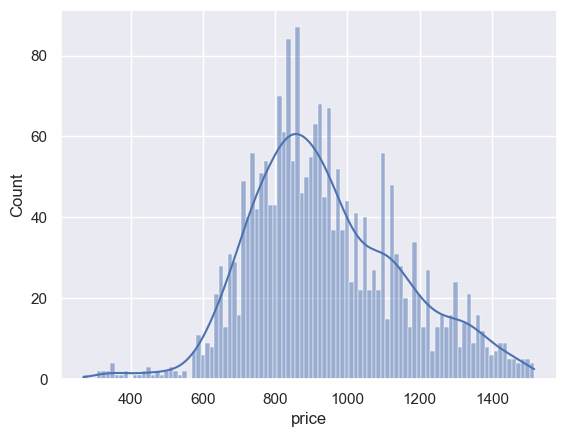

In [135]:
sns.set(color_codes=True)
sns.histplot(np.sqrt(q2_2021["price"]), kde=True, bins=100);

In [143]:
q2_2021["sqrt"] = np.sqrt(q2_2021[["price"]])
q2_2021

C:\Users\joshu\AppData\Local\Temp\ipykernel_47804\769670797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q2_2021["sqrt"] = np.sqrt(q2_2021[["price"]])


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,sqrt price,sqrt
id,,,,,,,,,,,,,,,,,,,,,
2619950340,2021-06-21,975000.0,4,2.5,2980,5859,2.0,NO,NO,NO,...,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305,987.420883,987.420883
2873000690,2021-06-11,680000.0,4,3.0,2130,7649,1.0,NO,NO,NO,...,1100,440,280,1975,0,"20432 130th Place Southeast, Kent, Washington ...",47.418155,-122.166960,824.621125,824.621125
4036100065,2021-06-16,1318000.0,3,2.5,2420,19664,1.0,NO,NO,NO,...,1310,530,130,1956,0,"11620 Southeast 47th Place, Bellevue, Washingt...",47.562020,-122.184122,1148.041811,1148.041811
686400460,2021-06-14,1800000.0,6,3.0,3870,9463,1.5,NO,NO,NO,...,0,420,480,1966,0,"16850 Northeast 25th Street, Bellevue, Washing...",47.632550,-122.115375,1341.640786,1341.640786
5469700570,2021-06-23,810000.0,5,3.0,3030,24759,1.0,NO,NO,NO,...,1400,580,90,1969,0,"12605 Southeast 235th Street, Kent, Washington...",47.390790,-122.173030,900.000000,900.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422250040,2021-06-25,871567.0,4,3.0,3120,5913,2.0,NO,NO,NO,...,0,400,190,2021,0,"1367 Bandera Avenue Southeast, North Bend, Was...",47.479700,-121.735855,933.577528,933.577528
7177300480,2021-06-21,900000.0,3,2.0,1310,4120,1.0,NO,NO,NO,...,0,0,40,1952,0,"7510 23rd Avenue Northeast, Seattle, Washingto...",47.683460,-122.302590,948.683298,948.683298
2408100010,2021-06-11,1011000.0,3,2.0,1460,10995,1.0,NO,NO,YES,...,0,460,180,1981,0,"17414 Northeast 39th Court, Redmond, Washingto...",47.645550,-122.108060,1005.484958,1005.484958


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


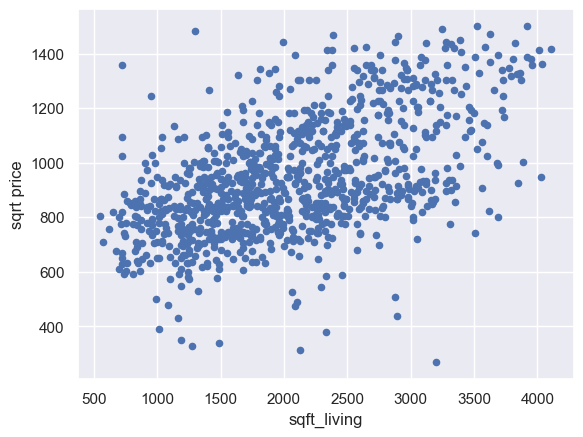

In [147]:
q2_2021.sample(1000, random_state=42).plot.scatter(x="sqft_living", y="sqrt price");

In [149]:
y = q2_2021["sqrt price"]
X_baseline = q2_2021[["sqft_living"]]

In [150]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

In [151]:
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:             sqrt price   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1014.
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          5.85e-184
Time:                        21:23:44   Log-Likelihood:                -14821.
No. Observations:                2253   AIC:                         2.965e+04
Df Residuals:                    2251   BIC:                         2.966e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         626.8185     10.521     59.580      

In [20]:
bedrooms = df.groupby(df.bedrooms)
one_bed = bedrooms.get_group(1)

In [21]:
one_bed.corr()["price"]

price            1.000000
bedrooms              NaN
bathrooms        0.204051
sqft_living      0.226530
sqft_lot         0.075466
floors           0.151585
sqft_above       0.212740
sqft_basement    0.127850
sqft_garage      0.136505
sqft_patio       0.121856
yr_built         0.099722
yr_renovated    -0.015860
lat              0.184331
long            -0.044976
Name: price, dtype: float64

In [22]:
def most_corr(dataframe):
    y = dataframe["price"]
    X_baseline = dataframe[[most_correlated]]
    baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
    baseline_results = baseline_model.fit()
    return print(baseline_results.summary())

In [23]:
most_corr(one_bed)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     19.58
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           1.28e-05
Time:                        18:05:21   Log-Likelihood:                -5150.2
No. Observations:                 364   AIC:                         1.030e+04
Df Residuals:                     362   BIC:                         1.031e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.956e+05   4.37e+04     11.334      

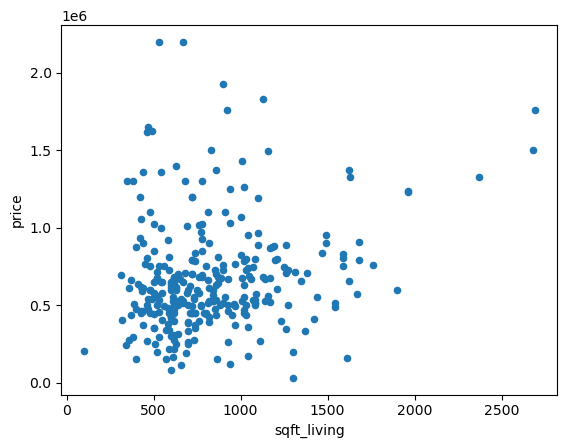

In [24]:
one_bed.sample(300, random_state=42).plot.scatter(x=most_correlated, y="price");

In [25]:
two_bed = bedrooms.get_group(2)

In [26]:
most_corr(two_bed)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     1030.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          1.55e-198
Time:                        18:05:23   Log-Likelihood:                -49173.
No. Observations:                3523   AIC:                         9.835e+04
Df Residuals:                    3521   BIC:                         9.836e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.027e+05   1.43e+04     21.091      

In [27]:
three_bed = bedrooms.get_group(3)
most_corr(three_bed)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     4076.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:05:23   Log-Likelihood:            -1.6987e+05
No. Observations:               12019   AIC:                         3.397e+05
Df Residuals:                   12017   BIC:                         3.398e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         2.41e+05   1.03e+04     23.492      

In [28]:
four_bed = bedrooms.get_group(4)
most_corr(four_bed)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     2603.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:05:23   Log-Likelihood:            -1.2227e+05
No. Observations:                8527   AIC:                         2.445e+05
Df Residuals:                    8525   BIC:                         2.446e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.018e+05   1.76e+04     11.475      

In [29]:
five_bed = bedrooms.get_group(5)
most_corr(five_bed)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     447.0
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           4.74e-90
Time:                        18:05:24   Log-Likelihood:                -30031.
No. Observations:                2087   AIC:                         6.007e+04
Df Residuals:                    2085   BIC:                         6.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.379e+05   4.42e+04      5.386      

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, baseline_results.predict(sm.add_constant(X_baseline)), squared=False)

363118.73118099076

In [31]:
categories = df.select_dtypes("object")

for col in categories:
    print(df[col].value_counts(), "\n")

7/1/2021      175
8/2/2021      166
6/23/2021     164
8/23/2021     161
6/28/2021     160
             ... 
1/16/2022       1
6/9/2022        1
12/25/2021      1
12/5/2021       1
12/26/2021      1
Name: date, Length: 364, dtype: int64 

NO     26672
YES      319
Name: waterfront, dtype: int64 

NO     26349
YES      642
Name: greenbelt, dtype: int64 

NO     22378
YES     4613
Name: nuisance, dtype: int64 

NONE         24302
AVERAGE       1611
GOOD           639
EXCELLENT      273
FAIR           166
Name: view, dtype: int64 

Average      16071
Good          7599
Very Good     3035
Fair           223
Poor            63
Name: condition, dtype: int64 

7 Average        11467
8 Good            8638
9 Better          2916
6 Low Average     2826
10 Very Good       623
5 Fair             387
11 Excellent        63
4 Low               50
3 Poor              13
12 Luxury            5
2 Substandard        2
1 Cabin              1
Name: grade, dtype: int64 

Gas                  18258
Electric

In [32]:
grade_col = "grade"
X_iterated = df[[most_correlated, grade_col]]
X_iterated

,sqft_living,grade
id,,
7399300360,1180,7 Average
8910500230,2770,7 Average
1180000275,2880,7 Average
1604601802,2160,9 Better
8562780790,1120,7 Average
...,...,...
7834800180,1910,8 Good
194000695,2020,7 Average
7960100080,1620,7 Average


In [33]:
X_iterated = pd.get_dummies(X_iterated, columns=[grade_col])
X_iterated

,sqft_living,grade_1 Cabin,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
id,,,,,,,,,,,,,
7399300360,1180,0,0,0,0,0,0,0,0,0,1,0,0
8910500230,2770,0,0,0,0,0,0,0,0,0,1,0,0
1180000275,2880,0,0,0,0,0,0,0,0,0,1,0,0
1604601802,2160,0,0,0,0,0,0,0,0,0,0,0,1
8562780790,1120,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7834800180,1910,0,0,0,0,0,0,0,0,0,0,1,0
194000695,2020,0,0,0,0,0,0,0,0,0,1,0,0
7960100080,1620,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
X_iterated.drop("grade_1 Cabin", axis=1, inplace=True)

In [35]:
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()

In [36]:
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     1302.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:05:27   Log-Likelihood:            -3.8252e+05
No. Observations:               26991   AIC:                         7.651e+05
Df Residuals:                   26978   BIC:                         7.652e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.85e+05   3

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, iterated_results.predict(sm.add_constant(X_iterated)), squared=False)

345631.41345285706

In [38]:
def category_corr(cat_col):
    X_iterated = df[[most_correlated, cat_col]]
    X_iterated = pd.get_dummies(X_iterated, columns=[grade_col])
    iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
    iterated_results = iterated_model.fit()
    return print(iterated_results.summary()), mean_squared_error(y, iterated_results.predict(sm.add_constant(X_iterated)), squared=False)

In [39]:
category_corr("condition")

KeyError: "None of [Index(['grade'], dtype='object')] are in the [columns]"

In [40]:
x = df[["sqft_living"]]
y = df[["price"]]

In [41]:
model = sm.OLS(endog=y, exog=sm.add_constant(x))
model

In [42]:
results = model.fit()

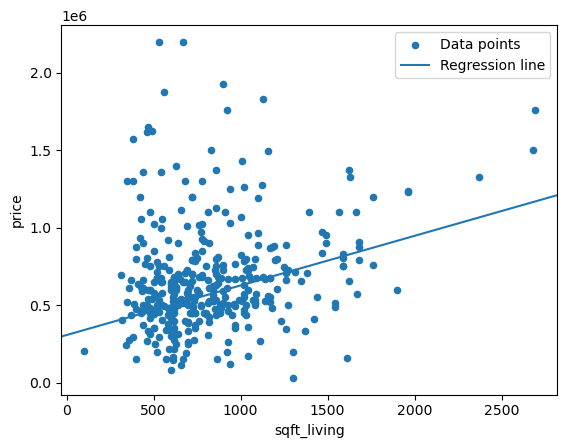

In [43]:
fig, ax = plt.subplots()
one_bed.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax)
ax.legend();

In [47]:
iterated_model